In [1]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [5]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

from sympy.abc import x, y, z
u = 7*x**2 - 3*y**2 - 20*z**2 + 10*3**S.Half*x*y + 0*x*z + 0*y*z
A = Matrix([[7, 5*3**S.Half, 0], [5*3**S.Half, -3, 0], [0, 0, -20]])
X = Matrix([x, y, z])
res = simplify(expand(X.T*A*X))
display(X, res, res[0] - u)

ev = A.eigenvects()#собственные векторы матрицы $A$ 
P = Matrix([])

# вывод собственных чисел и собственных векторов
for vector in ev:
    print('собственное число', vector[0], 'кратность', vector[1], 'собственный вектор')
    for i in range(vector[1]): # это на случай кратных собственных чисел
        e_i = vector[2][i]
        display(e_i)
        # составляем матрицу перехода из нормарованных собственных векторов
        P = P.row_join(e_i.normalized()) # нормируем собственные векторы матрицы $A$
display(P)

Matrix([
[x],
[y],
[z]])

Matrix([[7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2]])

0

собственное число -20 кратность 1 собственный вектор


Matrix([
[0],
[0],
[1]])

собственное число -8 кратность 1 собственный вектор


Matrix([
[-sqrt(3)/3],
[         1],
[         0]])

собственное число 12 кратность 1 собственный вектор


Matrix([
[sqrt(3)],
[      1],
[      0]])

Matrix([
[0,      -1/2, sqrt(3)/2],
[0, sqrt(3)/2,       1/2],
[1,         0,         0]])

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [6]:
# матрица в новом базисе
A_new = P.T*A*P
display(simplify(A_new))
# квадраичная форма в новом базисе в виде многочлена
res = simplify(expand(X.T*A_new*X))[0]
display(res)
# красивый вид
display(collect(res, [x, y, z]))

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

-20*x**2 - 8*y**2 + 12*z**2

-20*x**2 - 8*y**2 + 12*z**2

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

матрица уравнения:


Matrix([
[ 97,  -72,   241],
[-72,   97,  -266],
[241, -266, -3452]])

столбец коодинат:


Matrix([
[x],
[y],
[1]])

проверка:


Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

матрица поворота:


Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

матрица после поворота:


Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

уравнение после поворота:


25*X**2 - 25*sqrt(2)*X + 169*Y**2 - 507*sqrt(2)*Y - 3452

новые коодинаты (после замены):


Matrix([
[  X + sqrt(2)/2],
[Y + 3*sqrt(2)/2],
[              1]])

итоговое уравнение:


25*X**2 + 169*Y**2 - 4225

Eq(X**2/169 + Y**2/25, 1)

Eq(x**2/169 + y**2/25, 1)

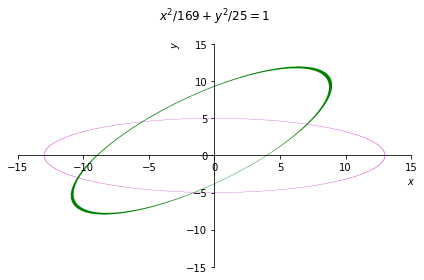

In [29]:
from sympy.abc import X, Y, Z

# A имеет вид:
#    x   y   1
# x x^2 x*y  x
# y x*y y^2  y
# 1  x   y   1

A3 = Matrix([[97, -S(144)/2, S(482)/2], [-S(144)/2, 97, -S(532)/2], [S(482)/2, -S(532)/2, -3452]])
X3 = Matrix([x, y, 1])
print("матрица уравнения:")
display(A3)
print("столбец коодинат:")
display(X3)

# проверка
eq3 = Eq(simplify(expand(X3.T*A3*X3))[0], 0)
print("проверка:")
display(eq3)

# матрица поворота на угол alpha, где
# cot(2*alpha) = (a11-a22)/(2*a12)
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]]) # поворот в трехмерном пространстве (зачем-то)
print("матрица поворота:")
display(P)

# применяем матрицу поворота (избавляемся от слагаемого с xy) 
A3 = simplify(expand((P.transpose()*A3*P))) 
print("матрица после поворота:")
display(A3)

# уравнение после поворота
X3 = Matrix((X, Y, 1))
print("уравнение после поворота:")
display(simplify(expand((X3.T*A3*X3)[0])))

# перенос начала координат (избавляемся от x и y)
# линейные замены имеют вид: 
# x = x' - a1/a11 
# y = y' - a2/a22
X3_new = Matrix((X - A3[0, 2]/A3[0, 0], Y - A3[1, 2]/A3[1, 1], 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
print("новые коодинаты (после замены):")
display(X3_new)
print("итоговое уравнение:")
display(eq3_new)
# переносим свободный член вправо и приводим урв
free = eq3_new.subs({X: 0, Y: 0}) 
eq3_last = eq3_new/(-free) + 1 
display(Eq(eq3_last, 1))
# подстановка букв для рисовалки
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

# рисунок
p = plot_implicit(eq3,(x, -15, 15), (y, -15, 15), line_color='g', xlabel='$x$', ylabel='$y$', title=latex(eq3_last_xy, mode='inline') + '\n', adaptive = True,show=False)
p.extend(plot_implicit(eq3_last_xy,(x, -15, 15), (y, -15, 15), line_color='m',  adaptive = True,show=False))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

матрица уравнения:


Matrix([
[ 1, 1, -2],
[ 1, 1,  2],
[-2, 2, -4]])

столбец коодинат:


Matrix([
[x],
[y],
[1]])

проверка:


Eq(x**2 + 2*x*y - 4*x + y**2 + 4*y - 4, 0)

матрица поворота:


Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

матрица после поворота:


Matrix([
[2,         0,         0],
[0,         0, 2*sqrt(2)],
[0, 2*sqrt(2),        -4]])

уравнение после поворота:


2*X**2 + 4*sqrt(2)*Y - 4

новые коодинаты (после замены):


Matrix([
[            X],
[Y + sqrt(2)/2],
[            1]])

итоговое уравнение:


2*X**2 + 4*sqrt(2)*Y

Eq(2*x**2 + 4*sqrt(2)*y, 0)

-2*sqrt(2)*y

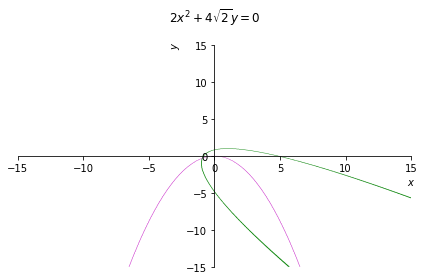

In [32]:
from sympy.abc import X, Y, Z

# A имеет вид:
#    x   y   1
# x x^2 x*y  x
# y x*y y^2  y
# 1  x   y   1

A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X3 = Matrix([x, y, 1])
print("матрица уравнения:")
display(A3)
print("столбец коодинат:")
display(X3)

# проверка
eq3 = Eq(simplify(expand(X3.T*A3*X3))[0], 0)
print("проверка:")
display(eq3)

# матрица поворота на угол alpha, где
# cot(2*alpha) = (a11-a22)/(2*a12)
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]]) # поворот в трехмерном пространстве (зачем-то)
print("матрица поворота:")
display(P)

# применяем матрицу поворота (избавляемся от слагаемого с xy) 
A3 = simplify(expand((P.transpose()*A3*P))) 
print("матрица после поворота:")
display(A3)

# уравнение после поворота
X3 = Matrix((X, Y, 1))
print("уравнение после поворота:")
display(simplify(expand((X3.T*A3*X3)[0])))

# перенос начала координат (избавляемся от x и y)
# линейные замены имеют вид: 
# x = x' - a1/a11 
# y = y' - a2/a22
X3_new = Matrix((X, Y + 2 ** (S(1) / 2) / 2, 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
print("новые коодинаты (после замены):")
display(X3_new)
print("итоговое уравнение:")
display(eq3_new)

eq3_last_xy = Eq(eq3_new.subs({X: x, Y: y}), 0)
display(eq3_last_xy)
right = solve(eq3_last_xy, x**2)[0]
display(right)

# рисунок
p = plot_implicit(eq3,(x, -15, 15), (y, -15, 15), line_color='g', xlabel='$x$', ylabel='$y$', title=latex(eq3_last_xy, mode='inline') + '\n', adaptive = True,show=False)
p.extend(plot_implicit(eq3_last_xy,(x, -15, 15), (y, -15, 15), line_color='m',  adaptive = True,show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

#143
# -3653*x**2 + 60*3**S.Half*x*y - 489*91**S.Half*x*z + 3700*y**2 - 20*273**S.Half*y*z + 3153 * z**2

from sympy.abc import x, y, z
Qi = Matrix([[-3653, S(60*sympy.sqrt(3))/2, S(-489*sympy.sqrt(91))/2],
             [S(60*sympy.sqrt(3))/2, 3700, S(-20* sympy.sqrt(273))/2],
             [S(-489*sympy.sqrt(91))/2, S(-20* sympy.sqrt(273))/2, 3153]])

display(Qi)
ev = Qi.eigenvects()
Pind = Matrix([])
display(ev)
for item in ev:
  degree = item[1]
  for i in range(degree):
    e_i = item[2][i]
    Pind = Pind.row_join(e_i.normalized())
display(Pindd)
Q_new = Pind.T*Qi*Pind

X = Matrix([x, y, z])
res = simplify(expand(X.T*Q_new*X))[0]

display(Qi, Pind, simplify(Q_new), res)

Matrix([
[          -3653,    30*sqrt(3), -489*sqrt(91)/2],
[     30*sqrt(3),          3700,   -10*sqrt(273)],
[-489*sqrt(91)/2, -10*sqrt(273),            3153]])